In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.train import train_model
from utils.model import TumorClassifier
from utils.transforms import train_transform, val_transform, test_transform
from utils.metrics import evaluate_and_report
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import cv2
import torch
from sklearn.preprocessing import LabelEncoder
from torchvision import datasets
from torch.utils.data import random_split, ConcatDataset, DataLoader

In [2]:
device = torch.device("cuda:7" if torch.cuda.is_available() else "cpu")

model = TumorClassifier()
model = model.to(device)

# Load dataset using ImageFolder
train_dataset = datasets.ImageFolder(root="../datasets/Training", transform=train_transform())
test_dataset = datasets.ImageFolder(root="../datasets/Testing", transform=train_transform())
classes = test_dataset.classes
full_dataset = ConcatDataset([train_dataset, test_dataset])

train_dataset, test_dataset = random_split(
    full_dataset,
    [0.7, 0.3],
    generator=torch.Generator().manual_seed(42)
)

In [ ]:
from collections import Counter

# Get class indices for each image
class_indices = [label for _, label in train_dataset]

# Count distribution
class_counts = Counter(class_indices)

distribution = {classes[i]: count for i, count in class_counts.items()}

# Display
for class_name, count in distribution.items():
    print(f"{class_name}: {count} images")

In [4]:
from collections import Counter
Counter(train_dataset.targets)

AttributeError: 'Subset' object has no attribute 'targets'

In [3]:
train_model(
    model,
    train_dataset,
    batch_size=32,
    epochs=20,
    val_split=0.2,
    lr=0.001,
    save_path="../models/effnet_weights_sampler_cosine_best_model.pth",
    use_sampler=True,
    scheduler_type="cosine",
)

Epoch [1/20] - Train Loss: 0.3676, Train Acc: 0.8765 - Val Loss: 0.1282, Val Acc: 0.9634
Epoch [2/20] - Train Loss: 0.1731, Train Acc: 0.9370 - Val Loss: 0.1817, Val Acc: 0.9440
Epoch [3/20] - Train Loss: 0.1213, Train Acc: 0.9598 - Val Loss: 0.0889, Val Acc: 0.9695
Epoch [4/20] - Train Loss: 0.1211, Train Acc: 0.9581 - Val Loss: 0.0671, Val Acc: 0.9766
Epoch [5/20] - Train Loss: 0.0889, Train Acc: 0.9718 - Val Loss: 0.0574, Val Acc: 0.9797
Epoch [6/20] - Train Loss: 0.0830, Train Acc: 0.9718 - Val Loss: 0.0443, Val Acc: 0.9807
Epoch [7/20] - Train Loss: 0.0660, Train Acc: 0.9774 - Val Loss: 0.0345, Val Acc: 0.9837
Epoch [8/20] - Train Loss: 0.0616, Train Acc: 0.9792 - Val Loss: 0.0415, Val Acc: 0.9878
Epoch [9/20] - Train Loss: 0.0663, Train Acc: 0.9764 - Val Loss: 0.0343, Val Acc: 0.9847
Epoch [10/20] - Train Loss: 0.0371, Train Acc: 0.9870 - Val Loss: 0.1400, Val Acc: 0.9563
Epoch [11/20] - Train Loss: 0.0365, Train Acc: 0.9893 - Val Loss: 0.0456, Val Acc: 0.9847
Epoch [12/20] - Tra

([0.3676188991314636,
  0.17313930797937502,
  0.12134561455895225,
  0.12111816425340456,
  0.08891975159231758,
  0.08303329286775843,
  0.06597061716796604,
  0.06159789085835143,
  0.06630344062960263,
  0.03707749575156819,
  0.03651073549665325,
  0.05411813867950256,
  0.049976747319903404,
  0.040177102524542874],
 [0.12821864896848995,
  0.18173405803959827,
  0.08885388791424698,
  0.06710812591948563,
  0.0574284650476333,
  0.044318291153057666,
  0.03446202715697754,
  0.04152147637160034,
  0.03430071416068661,
  0.13999489616007674,
  0.04557303171074312,
  0.05746994968712148,
  0.11114664059719744,
  0.038893833837984934],
 [0.8764616166751398,
  0.9369598373157092,
  0.9598373157092018,
  0.9580579562785968,
  0.9717844433146924,
  0.9717844433146924,
  0.9773767158108795,
  0.9791560752414845,
  0.9763599389933909,
  0.9870360955770209,
  0.9893238434163701,
  0.9822064056939501,
  0.9832231825114387,
  0.985510930350788],
 [0.9633774160732451,
  0.9440488301119023,


In [4]:
device = torch.device("cuda:5" if torch.cuda.is_available() else "cpu")

model = TumorClassifier()
model = model.to(device)
model.load_state_dict(torch.load("../models/effnet_weights_sampler_cosine_best_model.pth"))
model.eval()  # Set the model to evaluation mode

/tmp/ipykernel_991031/31368037.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("../models/effnet_weights_sampler_cosine_best_model.pth")

TumorClassifier(
  (base_model): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_act

In [5]:
test_dataset.dataset.transform = val_transform()
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


=== Classification Report ===
              precision    recall  f1-score   support

      glioma       0.98      0.99      0.98       477
  meningioma       0.97      0.97      0.97       499
     notumor       1.00      0.99      0.99       608
   pituitary       0.99      0.98      0.99       522

    accuracy                           0.98      2106
   macro avg       0.98      0.98      0.98      2106
weighted avg       0.98      0.98      0.98      2106


=== Test Accuracy: 98.43% ===


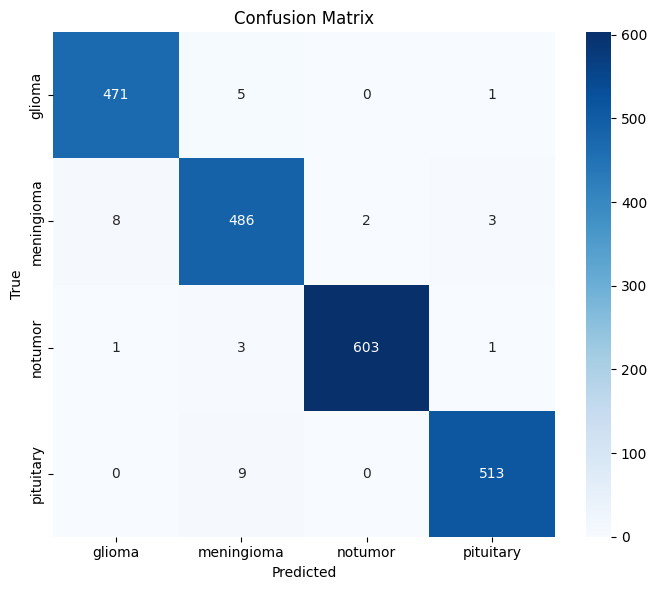

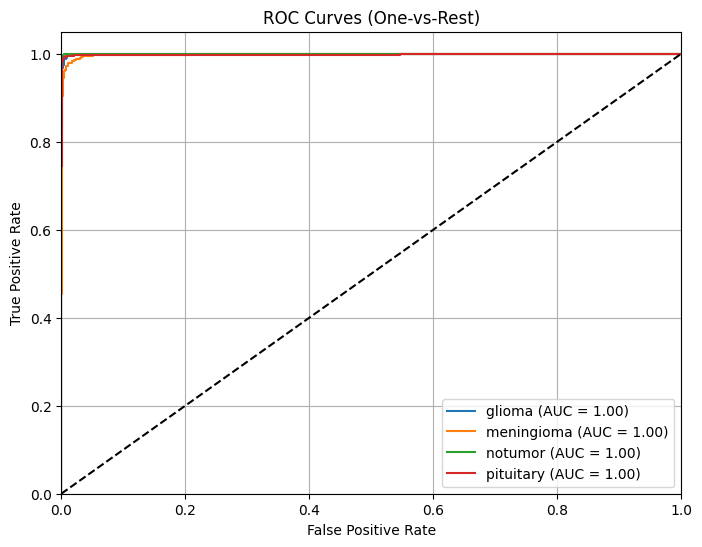

(array([2, 3, 2, ..., 1, 0, 0]),
 array([2, 3, 2, ..., 1, 0, 0]),
 array([[3.4495744e-05, 2.5767382e-04, 9.9952221e-01, 1.8552542e-04],
        [8.5092179e-06, 1.9861989e-02, 1.0043095e-05, 9.8011941e-01],
        [4.8812982e-04, 7.5199694e-04, 9.9857080e-01, 1.8900271e-04],
        ...,
        [2.9285568e-05, 9.9995685e-01, 4.5422935e-06, 9.3335057e-06],
        [9.9999917e-01, 4.9668392e-07, 1.4976443e-08, 3.5123995e-07],
        [9.9990511e-01, 4.1813146e-05, 5.9201043e-06, 4.7118974e-05]],
       dtype=float32))

In [6]:
evaluate_and_report(
    model,
    test_loader,
    device,
    classes,
)